In [17]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\UDDESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\UDDESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
!pip install wordcloud



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Load the dataset (update the file path as needed)
df = pd.read_csv("true.csv")  # Example dataset

# Show first few rows
df.head()



,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
# Check data types and missing values
df.info()

# Summary statistics
df.describe()

# Check distribution of labels (if applicable)
if 'label' in df.columns:
    print(df['label'].value_counts())
    sns.countplot(x='label', data=df)
    plt.title('Distribution of Labels')
    plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [6]:
# Check missing values
print(df.isnull().sum())


title      0
text       0
subject    0
date       0
dtype: int64


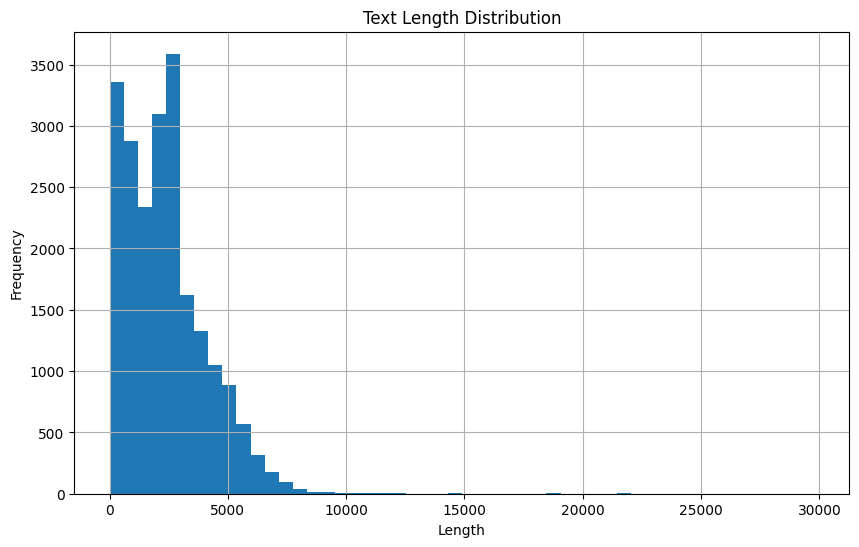

In [7]:
# Create text length column if text exists
if 'text' in df.columns:
    df['text_length'] = df['text'].apply(len)
    plt.figure(figsize=(10,6))
    df['text_length'].hist(bins=50)
    plt.title('Text Length Distribution')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.show()



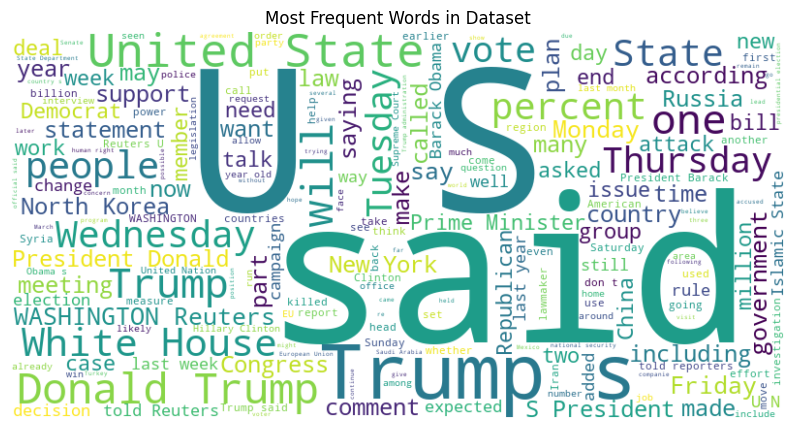

In [8]:
if 'text' in df.columns:
    all_text = " ".join(df['text'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Frequent Words in Dataset')
    plt.show()



In [9]:
# Drop rows with missing text
df = df.dropna(subset=['text'])

# Reset index
df = df.reset_index(drop=True)


In [42]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary datasets if you haven't yet
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\UDDESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\UDDESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Install nltk if not already installed
!pip install nltk

# Import libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required datasets
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Example text cleaning function
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove punctuation and numbers
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

# Example dataframe
import pandas as pd

data = {
    'text': ["This is an example sentence!", "Cleaning text is fun and useful."]
}

df = pd.DataFrame(data)

# Apply text cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Display cleaned text
df[['text', 'clean_text']]




[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\UDDESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\UDDESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,clean_text
0,This is an example sentence!,example sentence
1,Cleaning text is fun and useful.,cleaning text fun useful


In [15]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define text cleaning function
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove punctuation and numbers
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

# Apply text cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Display cleaned text
df[['text', 'clean_text']].head()


,text,clean_text
0,This is an example sentence!,example sentence
1,Cleaning text is fun and useful.,cleaning text fun useful


In [19]:
if 'label' in df.columns:
    selector = SelectKBest(chi2, k=2000)
    X_new = selector.fit_transform(X, y)
    print("Original shape:", X.shape)
    print("Reduced shape:", X_new.shape)


In [20]:
if 'label' in df.columns:
    model = RandomForestClassifier()
    model.fit(X, y)
    importances = model.feature_importances_
    indices = np.argsort(importances)[-10:]
    top_features = [vectorizer.get_feature_names_out()[i] for i in indices]
    print("Top 10 important features:")
    print(top_features)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Apply TF-IDF on clean text column
X = vectorizer.fit_transform(df['clean_text']).toarray()

print("Shape of feature matrix:", X.shape)


Shape of feature matrix: (2, 6)


In [25]:
print("Shape of X:", X.shape)
if 'X_new' in locals():
    print("Shape of X_new:", X_new.shape)


Shape of X: (2, 6)


In [26]:
n_samples, n_features = X.shape  # or X_new.shape if using feature selection
n_components = min(10, n_samples, n_features)  # choose a small number

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_new if 'X_new' in locals() else X)

print("Shape after PCA:", X_pca.shape)


Shape after PCA: (2, 2)


In [27]:
from sklearn.decomposition import PCA

# Check shape first
data = X_new if 'X_new' in locals() else X
n_samples, n_features = data.shape
print(f"Samples: {n_samples}, Features: {n_features}")

# Choose a valid number of components
n_components = min(10, n_samples, n_features)
print(f"Using {n_components} components for PCA")

# Apply PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(data)

print("Shape after PCA:", X_pca.shape)


Samples: 2, Features: 6
Using 2 components for PCA
Shape after PCA: (2, 2)


In [30]:
n_samples, n_features = X.shape  # or X_new.shape if using feature selection
n_components = min(10, n_samples, n_features)  # choose a small number

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_new if 'X_new' in locals() else X)

print("Shape after PCA:", X_pca.shape)


Shape after PCA: (2, 2)


In [31]:
from sklearn.decomposition import PCA

# Check shape first
data = X_new if 'X_new' in locals() else X
n_samples, n_features = data.shape
print(f"Samples: {n_samples}, Features: {n_features}")

# Choose a valid number of components
n_components = min(10, n_samples, n_features)
print(f"Using {n_components} components for PCA")

# Apply PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(data)

print("Shape after PCA:", X_pca.shape)


Samples: 2, Features: 6
Using 2 components for PCA
Shape after PCA: (2, 2)


In [34]:
# Check the shape of your data before PCA
if 'X_new' in locals():
    data = X_new
    print("Using feature-selected data (X_new)")
else:
    data = X
    print("Using original data (X)")

print("Shape of data:", data.shape)


Using original data (X)
Shape of data: (2, 6)


In [37]:
from sklearn.decomposition import PCA

n_samples, n_features = data.shape
n_components = min(10, n_samples, n_features)  # dynamically adjust

print(f"Samples: {n_samples}, Features: {n_features}")
print(f"Setting n_components to: {n_components}")

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(data)

print("Shape after PCA:", X_pca.shape)


Samples: 2, Features: 6
Setting n_components to: 2
Shape after PCA: (2, 2)


In [41]:
# Check how many examples belong to each class (e.g., fake vs real)
if 'title' in df.columns:
    print(df['title'].value_counts())
    sns.countplot(x='title', data=df)
    plt.title('title Distribution')
    plt.show()
else:
    print("title column not found!")


title column not found!


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'label' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x='label', data=df)
    plt.title('Distribution of Labels')
    plt.xlabel('Label (0 = Real, 1 = Fake)')
    plt.ylabel('Number of Samples')
    plt.show()
else:
    print("Label column not found!")


Label column not found!


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of labels if 'label' column exists
if 'label' in df.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x='label', data=df)
    plt.title('Label Distribution')
    plt.xlabel('Label (0 = Real, 1 = Fake)')
    plt.ylabel('Number of Samples')
    plt.show()
else:
    print("Label column not found!")


Label column not found!


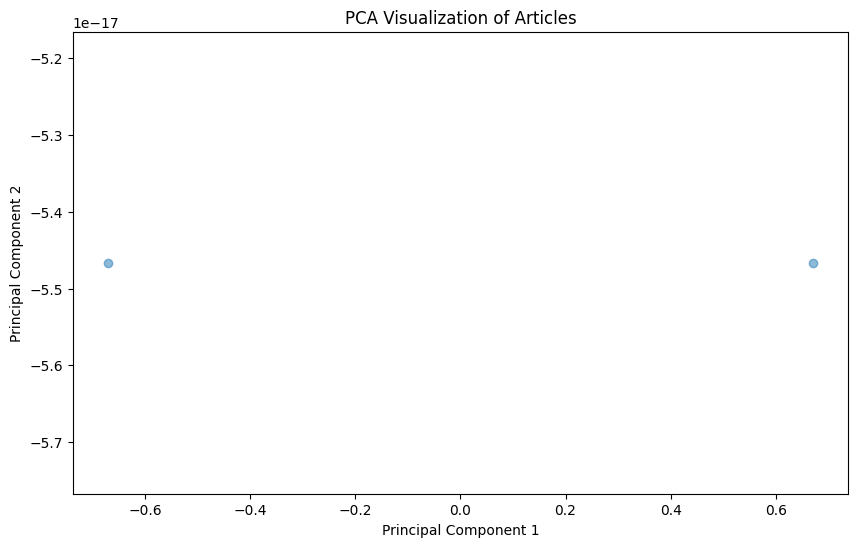

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['text']).toarray()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA Visualization of Articles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


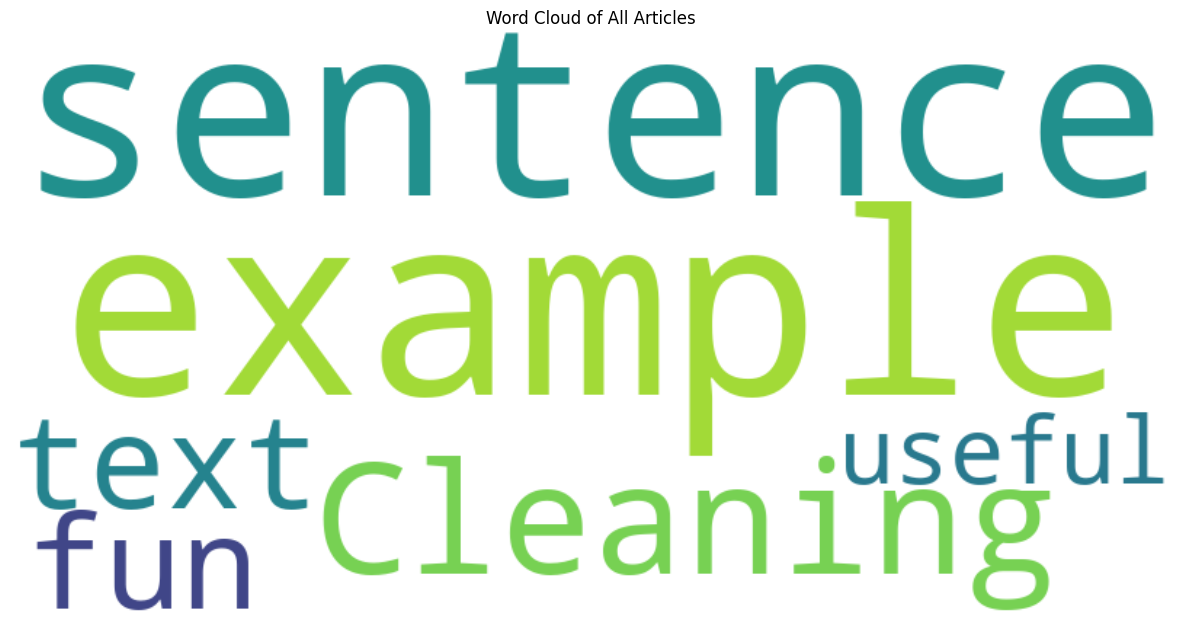

In [50]:
from wordcloud import WordCloud

all_text = " ".join(df['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Articles')
plt.show()



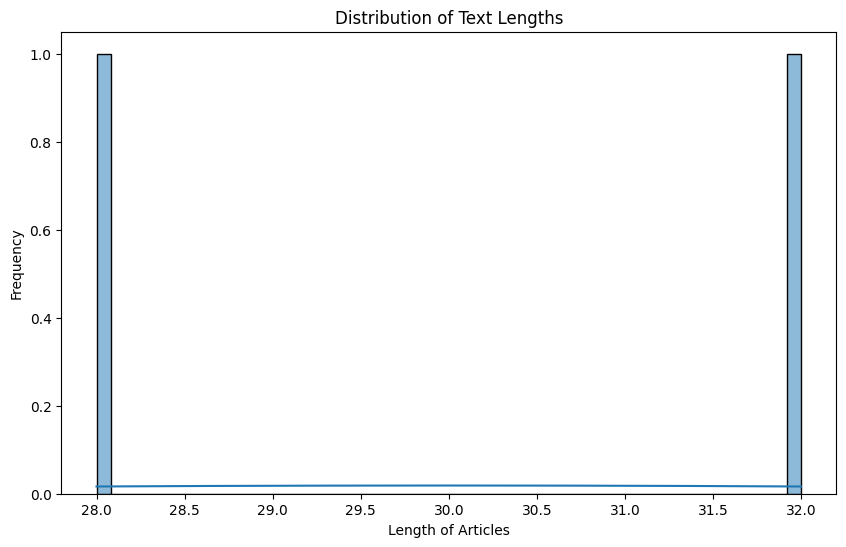

In [51]:
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Articles')
plt.ylabel('Frequency')
plt.show()


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names
df.columns = df.columns.str.strip()

# Check columns
print("Available columns:", df.columns)

# Plot if 'subject' column exists
if 'subject' in df.columns:
    plt.figure(figsize=(12,6))
    sns.countplot(y='subject', data=df, order=df['subject'].value_counts().index)
    plt.title('Distribution of News by Subject')
    plt.xlabel('Count')
    plt.ylabel('Subject')
    plt.show()
else:
    print("Column 'subject' not found!")


Available columns: Index(['text', 'clean_text', 'text_length'], dtype='object')
Column 'subject' not found!


In [59]:
df.isnull().sum()


title      0
text       0
subject    0
date       0
dtype: int64

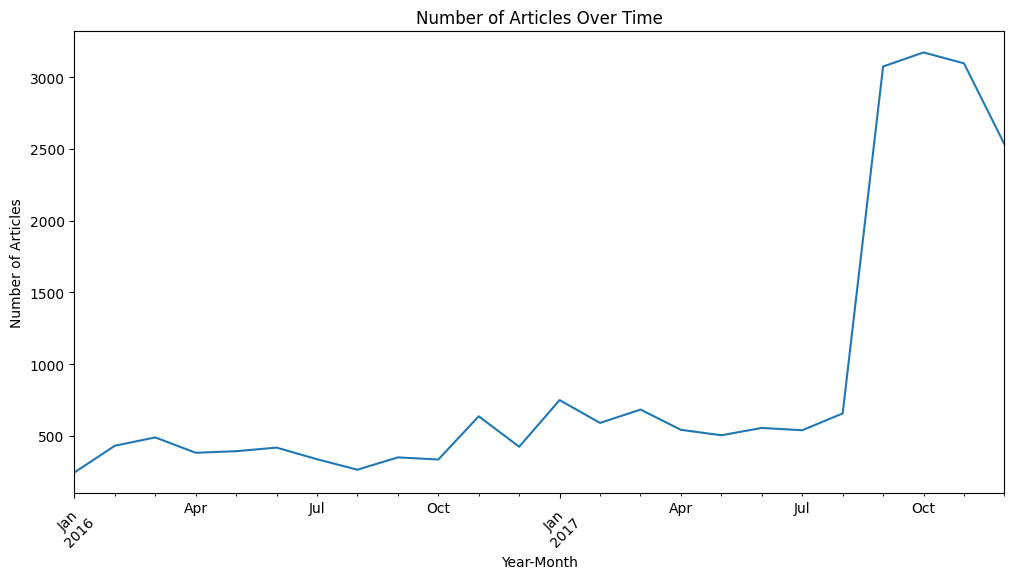

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create year-month column
df['year_month'] = df['date'].dt.to_period('M')

# Count articles per month
article_counts = df['year_month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
article_counts.plot(kind='line')
plt.title('Number of Articles Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()
